#### Librerías

In [1]:
# Manipulación de datos
import os
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga de datos

Los archivos csv se encuentran distribuidos en diferentes carpetas. Además, cada carpeta lleva el nombre de la plataforma pero los todos los archivos csv están como "titles"

In [18]:
directory = r'C:\Users\DELL\OneDrive\GITHUB - Repositorios\Datasets\Movies and Shows'
df_variables = []

for dirpath, dirname, filename in os.walk(directory, topdown = True):
   if len(filename) != 0:
       var_name = dirpath.split('\\')[-1].replace(' ','_')
       value = pd.read_csv(filepath_or_buffer = os.path.join(dirpath,filename[1]))
       value['platform'] = var_name
       globals()[var_name] = value
       df_variables.append(var_name)
print('Variables creadas: ',df_variables)

Variables creadas:  ['Amazon', 'Apple_TV', 'Disney', 'HBO_Max', 'NETFLIX', 'Paramount']


Los datos obtenidos deben concatenarse, entonces un buena práctica es verificar el nivel de similitud de las variables entre cada archivo cargado. Luego, se procederá con la concatenación de todos los archivos.

In [19]:
# Crear una lista que contenga listas
aux = []
for i in df_variables:
    aux.append(globals()[i].columns.tolist())    


# Comparación de los elementos en la lista
if all(set(i) == set(aux[0]) for i in aux):
    print("Columnas idénticas")
else:
    print("Columnas diferentes")
    
# Agregar una columna 
# Concatenación
df = pd.concat(objs = [globals()[i] for i in df_variables], axis = 0, join = 'outer', ignore_index = True)

Columnas idénticas


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25246 entries, 0 to 25245
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25246 non-null  object 
 1   title                 25246 non-null  object 
 2   type                  25246 non-null  object 
 3   description           25050 non-null  object 
 4   release_year          25246 non-null  int64  
 5   age_certification     12097 non-null  object 
 6   runtime               25246 non-null  int64  
 7   genres                25246 non-null  object 
 8   production_countries  25246 non-null  object 
 9   seasons               5791 non-null   float64
 10  imdb_id               23260 non-null  object 
 11  imdb_score            22646 non-null  float64
 12  imdb_votes            22586 non-null  float64
 13  tmdb_popularity       24519 non-null  float64
 14  tmdb_score            22109 non-null  float64
 15  platform           

#### 3. Limpieza de datos

##### Copia de trabajo

In [152]:
df2 = df.copy()

##### Verificación de valores faltantes

**1. ¿Existen valores faltantes?**

In [22]:
# Valores faltantes
#df2.isnull().sum().any()
df2.isna().sum().sort_values(ascending = False)

seasons                 19455
age_certification       13149
tmdb_score               3137
imdb_votes               2660
imdb_score               2600
imdb_id                  1986
tmdb_popularity           727
description               196
id                          0
title                       0
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
platform                    0
dtype: int64

**2. ¿Por qué existen tantos valores faltantes en la columna seasons? ¿Qué hay de los valores faltantes en las otras columnas?** <br/>
Son películas, estos casos no llevan temporadas. Por otra parte, se asume que los valores faltantes no son causa de un error de registro, solamente marcan la carencia de información

In [23]:
df2.loc[df2['seasons'].isna(),'type'].value_counts()

MOVIE    19455
Name: type, dtype: int64

##### Selección de variables

**1. ¿Qué variables serán utilizadas para el análisis?**

In [153]:
removed_columns = ['age_certification','production_countries','imdb_id','imdb_votes','tmdb_popularity','genres','platform']
df2.drop(columns = removed_columns, inplace = True)

##### Valores duplicados

**1. ¿Existen valores duplicados?**

In [154]:
# Nombres de columnas a comparar
# aux = list(set(df2.columns) - set(['platform']))

# Muestra e duplicados
df2[df2.duplicated(keep = False)].sort_values(by = 'id', ascending = True).head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,tmdb_score
11057,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,NaN,5.6,4.9
284,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,NaN,5.6,4.9
9464,tm1000619,Radhe Shyam,MOVIE,"Vikramaditya, a world-renowned palmist, believ...",2022,138,NaN,5.3,5.5
23845,tm1000619,Radhe Shyam,MOVIE,"Vikramaditya, a world-renowned palmist, believ...",2022,138,NaN,5.3,5.5
216,tm100065,Blind Husbands,MOVIE,An Austrian military officer and rogue attempt...,1919,99,NaN,6.9,6.2


In [155]:
# Remover duplicados
df2.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

In [159]:
# Los duplicados se removieron exitosamente
df2.duplicated(keep = False).any()

False

##### Tipos de variable

**1. ¿Es correcto el tipo de variable asignado?** <br/>
Todos los tipos de variables son correctos. Sin embargo, es recomendable cambiar la columna "type" a "categorical" por cuestiones de desempeño

In [163]:
df2['type'] = df2['type'].astype('category')

#### 4. Análisis rápido de los datos

In [167]:
df2.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,NaN,8.6,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,69,NaN,7.8,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,NaN,7.8,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.5,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,133,NaN,7.8,7.400


##### Distribución de las temporadas en los shows

In [175]:
df2['seasons'].max()

53.0

In [11]:
# Alternativa 1
# aux = [i for i in range(2,12,2)]
# df2['seasons'].value_counts(bins = aux)


# Alternativa 2
aux = [i for i in range(0,12,2)]
#aux_2 = [i for i in aux] 
aux.append(np.inf)
print(aux)
#intervals = pd.cut(df2['seasons'], bins = [np.NINF,5,10,15,np.inf], right = True)
intervals = pd.cut(df2['seasons'], bins = aux, right = True).value_counts()
intervals

# Gráfico
#sns.catplot(data = intervals.reset_index(),
#            x = 'index', y = 'seasons', kind = 'bar',
#            height = 4, aspect = 2)
#plt.show()

[0, 2, 4, 6, 8, 10, inf]


(0.0, 2.0]     4049
(2.0, 4.0]      976
(4.0, 6.0]      385
(6.0, 8.0]      158
(10.0, inf]     149
(8.0, 10.0]      74
Name: seasons, dtype: int64

In [12]:
intervals.reset_index()

,index,seasons
0,"(0.0, 2.0]",4049
1,"(2.0, 4.0]",976
2,"(4.0, 6.0]",385
3,"(6.0, 8.0]",158
4,"(10.0, inf]",149
5,"(8.0, 10.0]",74


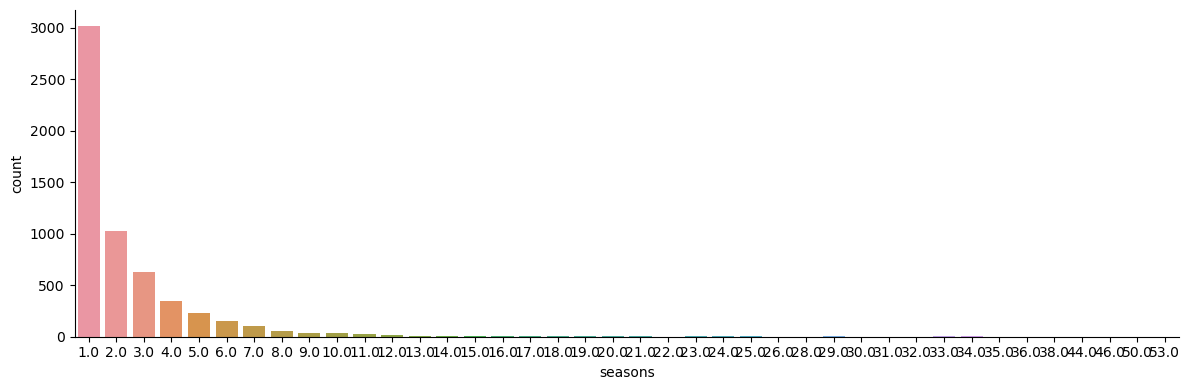

In [13]:
sns.catplot(data = df2, x = 'seasons',
            kind = 'count', height= 4, aspect = 3)
plt.show()

In [14]:
# Hay 21487 id de películas con 1 aparición en el dataset
# Hay 1851 id de películas con 2 apariciones en el dataset
# Hay 19 id de películas con 3 apariciones en el dataset
df2['id'].value_counts().value_counts()

1    21487
2     1851
3       19
Name: id, dtype: int64

In [15]:
aux = df2.iloc[:,0:8].drop_duplicates(keep = False)
aux[aux['id'].duplicated(keep = False)].sort_values(by = 'id', ascending = True)

,id,title,type,description,release_year,age_certification,runtime,genres
9385,tm460993,Clifford the Big Red Dog,MOVIE,As Emily struggles to fit in at home and at sc...,2021,PG,95,"['comedy', 'drama', 'family', 'fantasy', 'scif..."
13899,tm460993,Clifford the Big Red Dog,MOVIE,As Emily struggles to fit in at home and at sc...,2021,PG,95,"['comedy', 'family', 'fantasy', 'scifi', 'roma..."


In [16]:
df2[df2.iloc[:,0:-1].duplicated(keep = False)].sort_values(by = ['id'], ascending = True).shape

(3749, 16)